<h1>CNNs for Image Classification (Using MNIST Dataset)</h1>

In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

<h2>Visualizing Image Data</h2>

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
single_image = x_train[0]

In [11]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
single_image.shape

(28, 28)

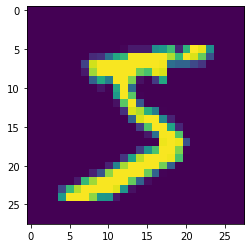

In [13]:
plt.imshow(single_image)

<h2>Pre-Processing Data</h2>

We first need to make sure the labels will be understandable by our CNN.

<b>Labels</b>

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The labels are categories of numbers. This will need to be translated to be a numerical array so the CNN can understand. Keras has an easy to use function for this:

In [16]:
from keras.utils.np_utils import to_categorical

In [17]:
y_train.shape

(60000,)

In [18]:
y_example = to_categorical(y_train)

In [19]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
y_example.shape

(60000, 10)

In [21]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test,10)

In [23]:
y_cat_train = to_categorical(y_train,10)

<b>Normalising the X Data</b>

In [24]:
single_image.max()

255

In [25]:
single_image.min()

0

In [26]:
x_train = x_train/255
x_test = x_test/255

In [27]:
scaled_single = x_train[0]

In [28]:
scaled_single.max()

1.0

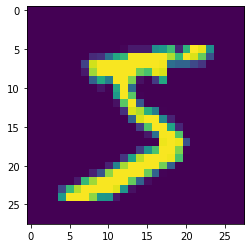

In [29]:
plt.imshow(scaled_single)

<h2>Reshaping the Data</h2>

60,000 images are stored in 28 by 28 pixel array formation. 

We need to add one more dimension to show we're dealing with 1 RGB channel (as the images are black and white).

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [32]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
x_test = x_test.reshape(10000,28,28,1)

In [35]:
x_test.shape

(10000, 28, 28, 1)

<h2>Training the Model</h2>

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (feel free to experiment with this number)
model.add(Dense(128, activation='relu'))

# CLASSIFIER - THERE ARE 10 POSSIBLE CLASSES (0-9)
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

<h2>Train the Model</h2>

In [39]:
# This will take a few minutes to load on most computers.
# Experiment with the number of Epochs
model.fit(x_train,y_cat_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1346 - accuracy: 0.9593
Epoch 2/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0498 - accuracy: 0.9854
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0354 - accuracy: 0.9893


<h2>Evaluate the Model</h2>

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0446 - accuracy: 0.9861


[0.04459749162197113, 0.9861000180244446]

In [42]:
from sklearn.metrics import classification_report

In [44]:
predictions = model.predict(x_test)

In [51]:
import numpy as np
x = np.argmax(predictions,axis=1)
print(x)

[7 2 1 ... 4 5 6]


In [53]:
y_cat_test.shape

(10000, 10)

In [54]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [55]:
x[0]

7

In [56]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [57]:
print(classification_report(y_test,x))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.96      1.00      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Looks like the CNN performed quite well!